# Seattle AirBNB Data

# **Table of Contents**
1. [Introduction](#intro)
1. [Business Understanding](#business)
1. [Analisys Data](#EDA)
    1. [Are neighborhoods important in get better housing?](#housing)
    1. [What is the evolution of the different types in Airbnb in Seatle?](#evolution)
    1. [What is the season of the year which it is more occupied?](#season)
1. [Data Preparation](#prepare)
1. [Model Data](#model)
1. [Conclusion](#conclusion)

## **Introduction**
<a id="intro"></a>

<img src="https://www.visittheusa.co/sites/default/files/styles/hero_m_1300x700/public/images/hero_media_image/2017-03/f3d1f001ce1e4f874adc9a88fd9fb095.jpeg?itok=DHjISMr_">

Since 2018, guests and hosts have used Airbnb to travel in a more unique,cheaper and personalized way, so improve the tourism.
Airbnb is a company, which offer a software plataform, which permit to people public rent of their houses or properties to other people. This rents are very famous because is cheaper than hotel or motel and best quality/price services.

As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA and to try get important information to understand this business and know the position of Seatle in Airbnb.  

## **Business Understanding**
<a id="business"></a>

I take a look of data, I want respond to this four questions, which are very interesting to understand te situation of Airbnb in Seatle. This questions are:

1. Are neighborhoods important in get better housing?
1. What is the evolution of the different types in Airbnb in Seatle?
1. What is the season of the year which it is more occupied?
1. How well can we predict an housing of cost? What aspects correlate well to cost?

## **Analisys Data**
<a id="EDA"></a>

To begin with Analisys Data, I need import this libraries and show the differents CSVs which we have to access and answer all preview question.

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

First, we are going to read all files and get the description of data.

In [4]:
calendar=pd.read_csv("calendar.csv")
listings=pd.read_csv("listings.csv")
reviews=pd.read_csv("reviews.csv")
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


This file have 4 columns, which are:
* **listing_id** : It is the id of each house of airbnb.
* **date** : It is the date, which show is avaible or no, and their cost.
* **avaible** : It is showing if the house was avaible.
* **price** : It is the cost of house in this date.

So this data have all information about the rent each house.

In [51]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


This file have 92 columns, i can't describe all columns, so when I answer the question describe the columns that I will use to answer. The important is that this data have all the information about each house.

In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


This file have 6 columns, which are:
* **listing_id** : It is the id of each house of airbnb.
* **id** : It is the id of each review of airbnb.
* **date** : It is the date, which was done the rewiews.
* **reviewer_id** : It is the id of each reviewer.
* **reviewer_name** : It is the name of each reviewer.
* **comments** : It is the comments of each review.

So this data have all information about the reviews each house.

### **Are neighborhoods important in get better housing?**
<a id="housing"></a>

To respond this question, We need get the extent of occupated houses group by neighbourhood, I use the column **neighbourhood_group_cleansed**, which show neighbourhood group each house.
So, I have merge two dataframes, which are **calendar** and **listing**.

In the dataframe calendar I get when each house is busy and the second dataframe get the relation each house to each neighbourhood.

In [186]:
data=calendar[calendar["available"]=="f"].listing_id.value_counts()
left=data.to_frame()
left = data.reset_index()
data=calendar[["listing_id","available"]].listing_id.value_counts()
rigth=data.to_frame()
rigth = data.reset_index()
data_full = pd.merge(left, rigth, on='index')
data_full.columns=["id","Number_occupaded","Number"]
data_full["Number_occupaded"]=data_full.Number_occupaded/data_full.Number
data_full=data_full.drop(labels="Number",axis=1)

In [187]:
left=data_full.copy()
right=listings[["id","neighbourhood_group_cleansed"]]
data_full = pd.merge(left, right, on='id')
data=data_full.groupby("neighbourhood_group_cleansed").mean().drop(labels=["id"],axis=1)

We can see that distribution of busy house is very changeable but we get the minimum number_occupaded and the maximun of this.

I want get this minimun and maximun to study to reviews about this houses and try get some important information and answer, why this neighbourhood are famous or unfamous about the reviews of hosts.

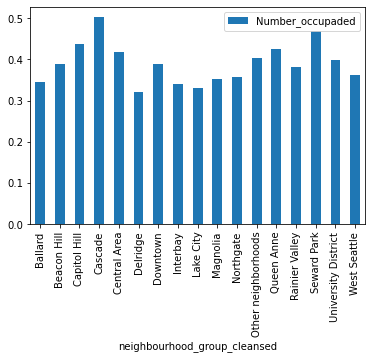

In [188]:
data.plot(kind="bar");

I have gotten the reviews and filter about this neighbourhood.

I have done two functions, the function call **get_neg_pos_word**, take all reviews of a neighbourhood and return the positives words and negative words, and the second function call **create_wordcloud**, take this list and created a wordcloud about the words more used.

So, we will can see the bad points of the houses in the worse neighbourhood and the good points of the houses in the best neighbourhood.

In [189]:
neighborhoods = ["Delridge", "Seward Park"]

data_filter=data_full[data_full.neighbourhood_group_cleansed.isin(neighborhoods)][["id","neighbourhood_group_cleansed"]].copy()
left=reviews[["listing_id","comments"]]
data_filter.columns=["listing_id","neighbourhood"]
data_merge = pd.merge(left, data_filter, on='listing_id')
data_merge=data_merge.dropna()

In [194]:
data_max=data_merge[data_merge["neighbourhood"]=="Seward Park"]
data_min=data_merge[data_merge["neighbourhood"]=="Delridge"]
textmax = " ".join(review for review in data_max.comments)
textmin = " ".join(review for review in data_min.comments)

In [199]:
def get_neg_pos_word(text):
    
    test_subset=text.split(" ")

    sid = SentimentIntensityAnalyzer()
    pos_word_list=[]
    neu_word_list=[]
    neg_word_list=[]

    for word in test_subset:
        if (sid.polarity_scores(word)['compound']) >= 0.5:
            pos_word_list.append(word)
        elif (sid.polarity_scores(word)['compound']) <= -0.5:
            neg_word_list.append(word)
    return pos_word_list,neg_word_list

def create_wordcloud(text):
    # Create stopword list:
    textmax = " ".join(review for review in text)
    stopwords = set(STOPWORDS)

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(textmax)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

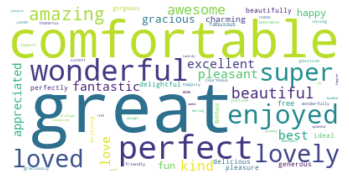

In [201]:
positive,negative=get_neg_pos_word(textmax)
create_wordcloud(positive)

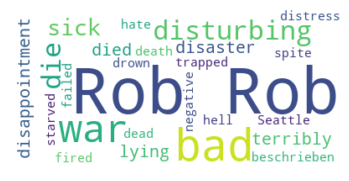

In [203]:
positive,negative=get_neg_pos_word(textmin)
create_wordcloud(negative)

### **What is the evolution of the different types in Airbnb in Seatle?**
<a id="evolution"></a>

### **What is the season of the year which it is more occupied?**
<a id="season"></a>

## **Data Preparation**
<a id="prepare"></a>

## **Model Data**
<a id="model"></a>

## **Conclusion**
<a id="conclusion"></a>